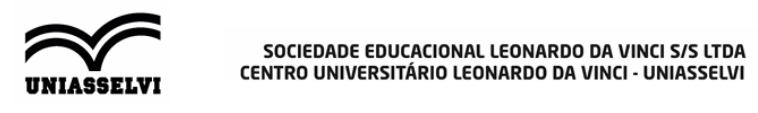

**PROJETO 1-  Aplicação de Métodos de Aprendizagem de Máquina**


**ANDRÉ CRUVINEL RESENDE / FERNANDA BRAGA DALLAROSA / IGOR LIMA SANSEVERNO**

**JULIANA BRAGA DALLAROSA / THIAGO DE MATTOS SANTOS**



**1. INTRODUÇÃO**

Doenças cardiovasculares (DCVs) são a principal causa de morte globalmente, levando a um número estimado de 17,9 milhões de vidas a cada ano, o que representa 31% de todas as mortes no mundo. Quatro em cada 5 mortes por DCV são devidas a ataques cardíacos e derrames, e um terço dessas mortes ocorre prematuramente em pessoas com menos de 70 anos. A insuficiência cardíaca é um evento comum causado por DCVs e este conjunto de dados contém 11 características que podem ser usadas para prever uma possível doença cardíaca.

Os problemas cardíacos compreendem uma gama de condições que atingem o sistema cardiovascular do ser humano, responsável por transportar o sangue, oxigênio e nutrientes para o corpo. Podendo ser relativamente benigna como a hipertensão arterial, ou aquelas extremamente graves, como o infarto agudo do miocárdio. O coração exerce um papel essencial, e deve ser analisada qualquer anomalia do seu funcionamento.

Pessoas com doença cardiovascular ou que estão em alto risco cardiovascular (devido à presença de um ou mais fatores de risco, como hipertensão, diabetes, hiperlipidemia ou doença já estabelecida) precisam de detecção precoce e gerenciamento, em que um modelo de aprendizado de máquina pode ser de grande ajuda.


**2. OBJETIVO**

O presente projeto tem como objetivo aplicar algoritmos de machine learning na predição do perfil de pacientes suscetíveis a sofrer um ataque cardíaco. O estudo foi realizado por meio da utilização de dados obtidos do repositório "Heart Attack Analysis & Prediction Dataset" no Kaggle, conforme as especificações técnicas descritas neste projeto.

**3. ESPECIFICAÇÃO TÉCNICA**

**3.1 Dataset**

Para desenvolvimento deste projeto foram utilizados os dados contidos no dataset disponível no link abaixo:

https://www.kaggle.com/code/fahadmehfoooz/heartattack-prediction-with-91-8-accuracy/input

**3.2 Formato:**

A base de dados estudada está disposta no formato .CSV, o qual está divivido em 14 colunas (features).




**3.3 Descrição das Features:**

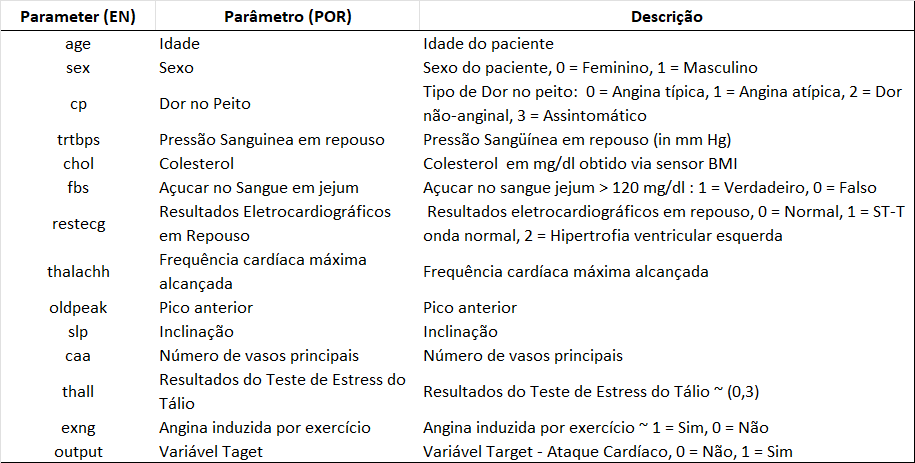


In [52]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**3.4 Métodos de Machine Learning**

Neste projeto foram empregados os seguintes métodos de machine learning:


*   Regressão Logística
*   Gaussian Naive Bayes
*   Suport Vector Machine


**Modo de aprendizado:** Supervisionado




**3.5 Métricas de Avaliação**

As seguintes métricas serão utilizadas nesse trabalho:


*   Acurácia
*   Matriz confusão
*   Precisão;
*   F1 Score;
*   Recall;


**4. PREPARAÇÃO DOS DADOS**

**4.1 Importação de Bibliotecas**

Primeiramente, as bibliotecas para visualização gráfica e criação do dataframe foram importadas para iniciar o ambiente de execução.


In [53]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

**4.2 Conexão com o dataset**

Através da função pd.read() é feita a conexão com o dataset 'Heart.csv'.


In [54]:
#Lendo o dataset

df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [55]:
#Analisando as variáveis do dataset:

df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [56]:
df.info()
print('O dataset tem',df.shape[0], 'linhas e ',df.shape[1], 'de colunas')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
O dataset tem 303 linhas e  14 de colunas


**4.3 Pré Processamento**

Nessa etapa foram realizados testes para verificar a base de dados e implementar o pré processamento.
Verificamos a presença de dados nulos e dados duplicados, realizando o tratamento, caso necessário.

**Dados Nulos**

In [57]:
#Verificando dados nulos no conjunto de dados:

df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

**Dados Duplicados**

In [58]:
#Verificando a existência de dados duplicados:

df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [59]:
#Removendo linha com dados duplicados:

df.drop_duplicates(keep='first',inplace=True)

#Confirmando a remoção da linha duplicada:

print('O dataset tem',df.shape[0], 'linhas e',df.shape[1], 'de colunas')

O dataset tem 302 linhas e 14 de colunas


**4.4 Análise Exploratória dos Dados**

Foram realizadas algumas análises no conjunto de dados, com intuito de entender o comportamento dos dados e a correlação entre as diferentes variáveis tendo em vista a ocorrência de ataque cardíaco.

**Resumo Estatísticas**

Com o emprego da função describe(), do pandas, é apresentado o resumo das estatísticas dos dados, retornando a média (mean), desvio padrão (std), mínimo (min), máximo (max) e os quartis 25%, 50% e 75%.

In [60]:
#Verificando dados estatísticas:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trtbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalachh,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exng,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


**Matrix de Correlação**

A matrix de correlação é uma tabela onde são apresentadas as correlações entre as variáveis do conjunto de dados. As correlações podem variar de -1 a 1, indicando a direção (positiva ou negativa) e a força da relação entre as variáveis.
A análise da matriz de correlação pode ajudar a identificar padrões, tendências e possíveis associações entre as variáveis.

Neste projeto, primeiramente, apresentamos a tabela com os valores de correlação e, após, plotamos os dados obtidos para a melhor identificação/visualização da informação.

In [61]:
#Calculando a matrix de correlação:

df_cmatrix = df.corr()
df_cmatrix

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


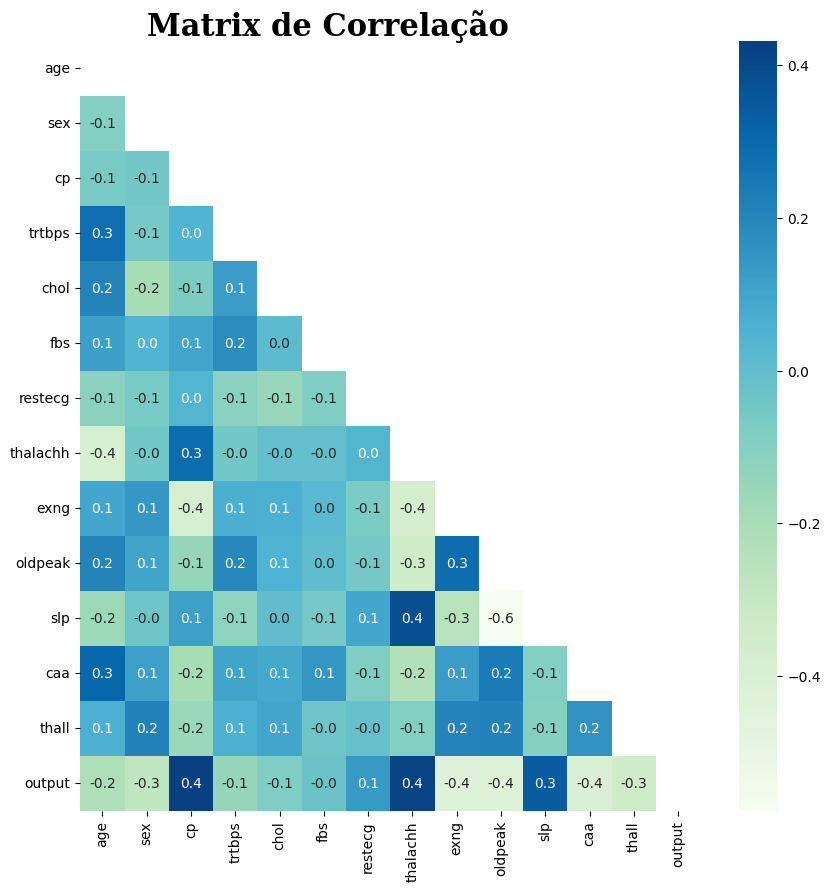

In [62]:
#Visualizando a matrix de correlação:

fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["#5833ff","#da8829"]
mask = np.triu(np.ones_like(df_cmatrix))
ax0.text(1.5,-0.1,"Matrix de Correlação",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
df_cmatrix = df.corr()
sns.heatmap(df_cmatrix,mask=mask,fmt=".1f",annot=True,cmap='GnBu')
plt.show()

Através da análise dos dados podemos verificar a existência de uma correlação negativa mais forte entre a variável output = Doença cardíaca com oldpeak, exng (-0.4) e correlação positiva com cp, thalachh (0.4).

**Visualização dos Dados**

Para conhecer cada uma das features (parâmetros) dentro do conjunto de dados, procedemos com a análise individual de cada uma delas, dividindo o conjunto de dados.


O número de pessoas do gênero 0 é 96 e o número de pessoas do gênero 1 é 206


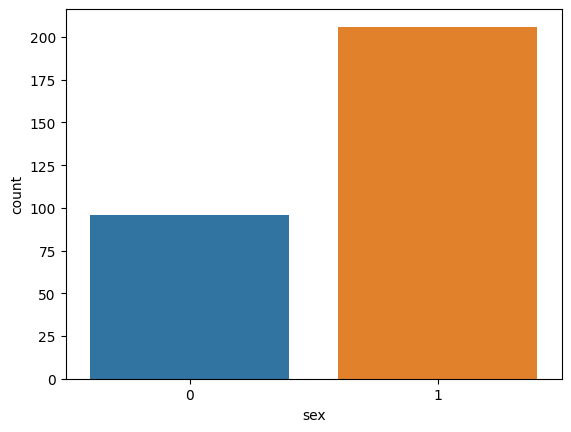

In [63]:
#Analisando as varíaveis
#Sexo = gênero

x=(df.sex.value_counts())
print(f'O número de pessoas do gênero 0 é {x[0]} e o número de pessoas do gênero 1 é {x[1]}')
p = sns.countplot(data=df, x="sex")
plt.show()

0    143
2     86
1     50
3     23
Name: cp, dtype: int64


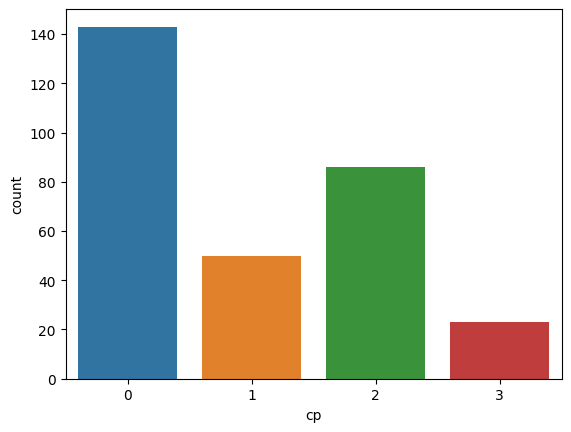

In [64]:
#Analisando a distribuição dos dados de Chest Pain = Dor no peito

x=(df.cp.value_counts())
print(x)
p = sns.countplot(data=df, x="cp")
plt.show()

Algumas observações sobre os dados obtidos:
* Pode-se observar que as pessoas apresentam dor no peito do tipo 0, ou seja, 'Angina Típica' é a mais alta.
* Pode-se observar que as pessoas têm dor no peito do tipo 3, ou seja, 'Assintomático' é o mais baixo.
* Também pode ser observado pessoas com dor no peito do tipo 0 em quase 50% de todas as pessoas.

0    257
1     45
Name: fbs, dtype: int64


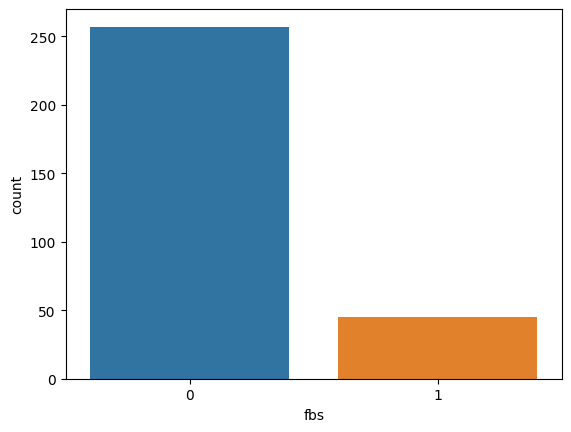

In [65]:
#Analisando a distribuição dos dados de FBS = Fasting Blood Sugar (Açucar no Sangue em Jejum)

x=(df.fbs.value_counts())
print(x)
p = sns.countplot(data=df, x="fbs")
plt.show()


Algumas observações:

* Os níveis normais de açúcar no sangue em jejum podem variar um pouco dependendo das diretrizes específicas de saúde, mas, em geral, os valores normais estão tipicamente abaixo de 100 mg/dL. Valores entre 100 e 125 mg/dL podem indicar pré-diabetes, enquanto valores de 126 mg/dL ou mais em jejum em dois testes separados geralmente indicam diabetes.
* Neste caso, no conjunto de dados deste projeto o número de pessoas com resultados de açúcar no sangue em jejum acima de 120 mg/dl (igual a 1) é 15%.

1    151
0    147
2      4
Name: restecg, dtype: int64


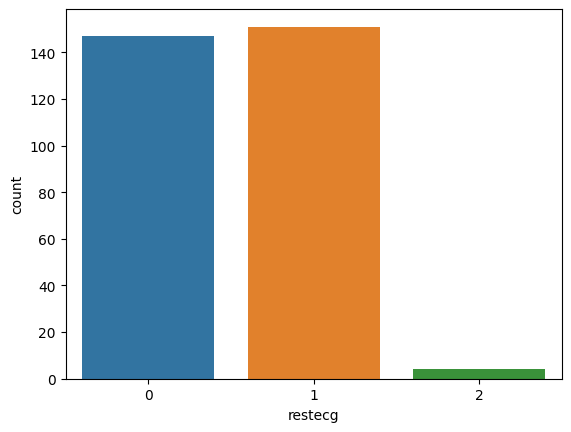

In [66]:
#Analisando a distribuição dos dados de restecg = Resting electrocardiographic results (Resultados Eletrocardiográficos em repouso)

x=(df.restecg.value_counts())
print(x)
p = sns.countplot(data=df, x="restecg")
plt.show()

Algumas observações sobre a análise dos resultados do teste de eletrocardiograma em repouso (restecg):

> 0 = Normal: Isso indica que o resultado do eletrocardiograma em repouso é considerado normal.

> 1 = ST-T wave normality: Isso sugere que há alguma anormalidade nas ondas ST-T do eletrocardiograma. As alterações nessas ondas podem indicar vários problemas cardíacos.

> 2 = Left ventricular hypertrophy (HVE - Hipertrofia Ventricular Esquerda): Indica que há um aumento anormal no tamanho ou massa muscular do ventrículo esquerdo do coração. Isso pode ser um sinal de esforço excessivo do coração, muitas vezes associado a condições como hipertensão arterial.

* No contexto cardíaco, o eletrocardiograma é uma ferramenta importante para avaliar a saúde do coração e identificar possíveis problemas.
* No conjunto de dados analisados, verificamos que muitas pessoas (151, mais da metade) apresentaram resultados que indicam alguma anormalidade, ou seja, indicam problemas cardíacos.



0    203
1     99
Name: exng, dtype: int64


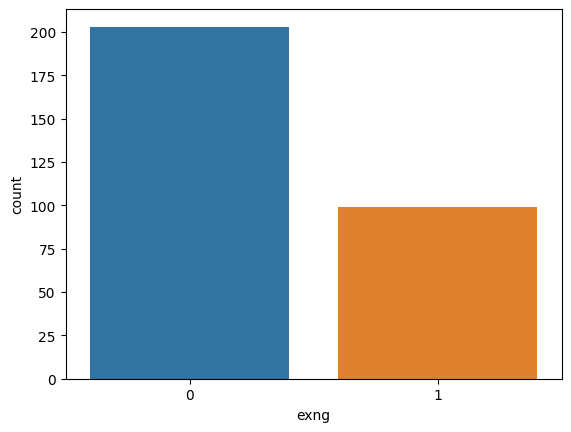

In [67]:
#Analisando a distribuição dos dados de exng = Exercise induced angina (Angina induzida por exercício)

x=(df.exng.value_counts())
print(x)
p = sns.countplot(data=df, x="exng")
plt.show()


Algumas observações sobre os resultados de exng = Angina induzida por exercício

> 1 = Yes (Sim): Indica que a pessoa experimentou angina durante o exercício. A angina é geralmente descrita como uma dor ou desconforto no peito que ocorre quando o coração não está recebendo sangue suficiente.

> 0 = No (Não): Indica que a pessoa não experimentou angina durante o exercício.

A presença de angina induzida por exercício pode ser um indicativo de insuficiência do fluxo sanguíneo para o músculo cardíaco durante atividade física. Isso pode ser um sinal de doença arterial coronariana ou outros problemas cardíacos.

* No conjunto de dados, os resultados mostram que mais que o dobro das pessoas não apresentaram angina.

2    165
3    117
1     18
0      2
Name: thall, dtype: int64


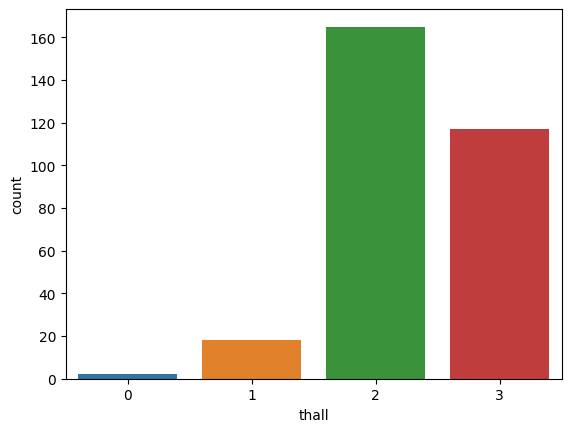

In [68]:
#Analisando a distribuição dos dados de thall = Thalium Stress Test result

x=(df.thall.value_counts())
print(x)
p = sns.countplot(data=df, x="thall")
plt.show()

Algumas observações sobre o teste de estresse com tálio:

O teste de estresse com tálio, também conhecido como cintilografia miocárdica com tálio ou cintilografia de perfusão miocárdica, é um exame utilizado para avaliar o fluxo sanguíneo para o músculo cardíaco (miocárdio). Ele é frequentemente realizado em conjunto com um teste de estresse, que pode ser uma caminhada em uma esteira ou uma administração de medicamentos para simular o estresse cardíaco. Durante o teste, uma pequena quantidade de tálio radioativo é injetada na corrente sanguínea. O tálio é distribuído pelo miocárdio em proporção ao fluxo sanguíneo. Em seguida, são realizadas imagens do coração usando uma câmera especial que detecta a radiação do tálio. Isso permite avaliar a distribuição do tálio no miocárdio, revelando áreas que podem não estar recebendo sangue adequadamente. O resultado do teste de estresse com tálio pode indicar áreas do coração que não estão recebendo um suprimento sanguíneo adequado, o que pode ser um sinal de obstrução nas artérias coronárias. Essa informação é valiosa para a avaliação de condições cardíacas, como doença arterial coronariana.
* No conjunto de dados analisados, o resultado 2 é o que apresenta maior quantidade de ocorrências (em torno de 54% dos dados)




**Distribuição e assimetria dos dados**

Para verificar a linearidade das variáveis, é uma boa prática traçar o gráfico de distribuição e procurar a assimetria dos recursos. A estimativa de densidade do kernel (kde) é uma ferramenta bastante útil para traçar a forma de uma distribuição.
No projeto apresentado, utilizamos os códigos abaixo para criar um conjunto de subplots mostrando a distribuição de dados para cada coluna no DataFrame, usando histogramas e uma estimativa de densidade do kernel para suavizar a visualização. O layout foi organizado em uma grade de 5 por 3 subplots.

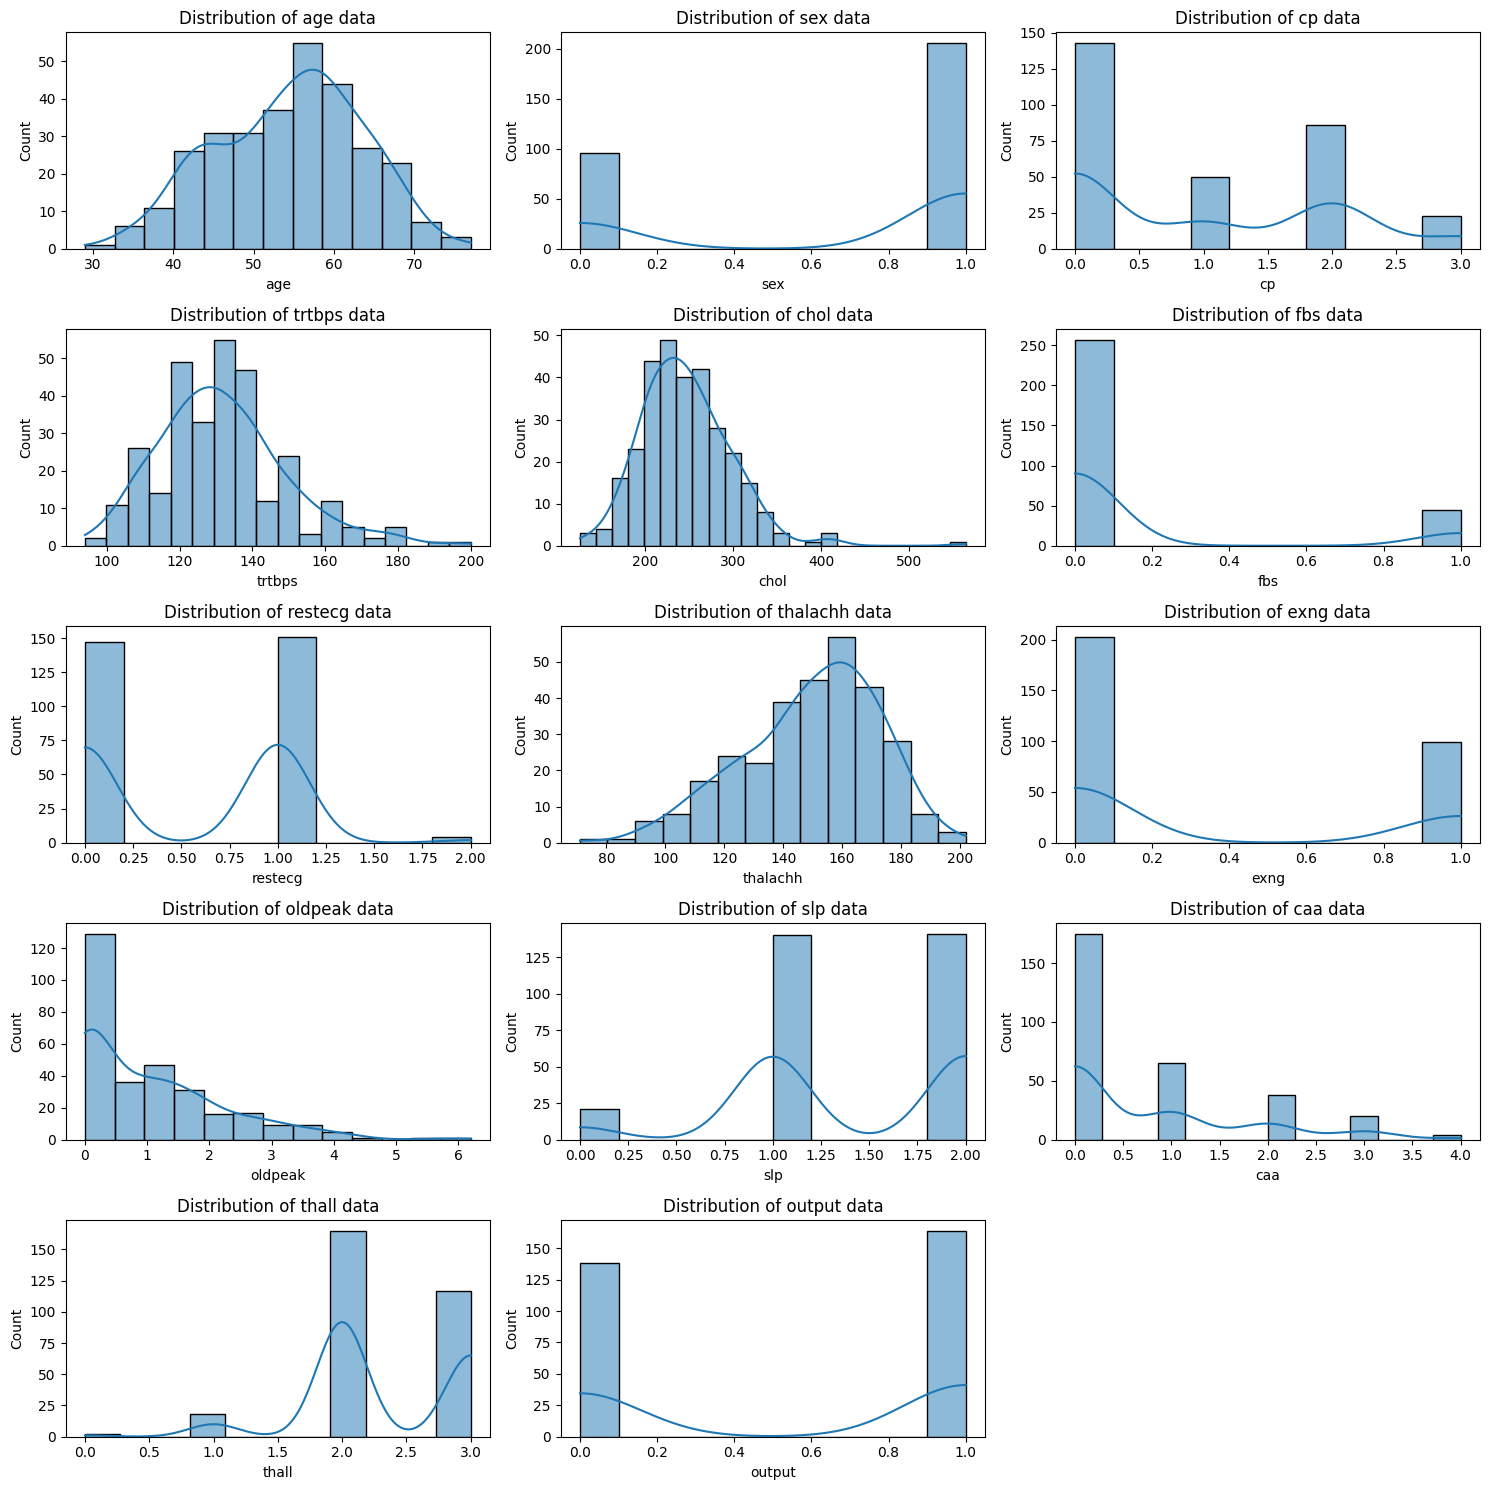

In [69]:
#Analisando os dados de distribuição das variáveis e a sua linearidade

plt.figure(figsize=(15,15))
for i,col in enumerate(df.columns,1):
    plt.subplot(5,3,i)
    plt.title(f"Distribution of {col} data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()


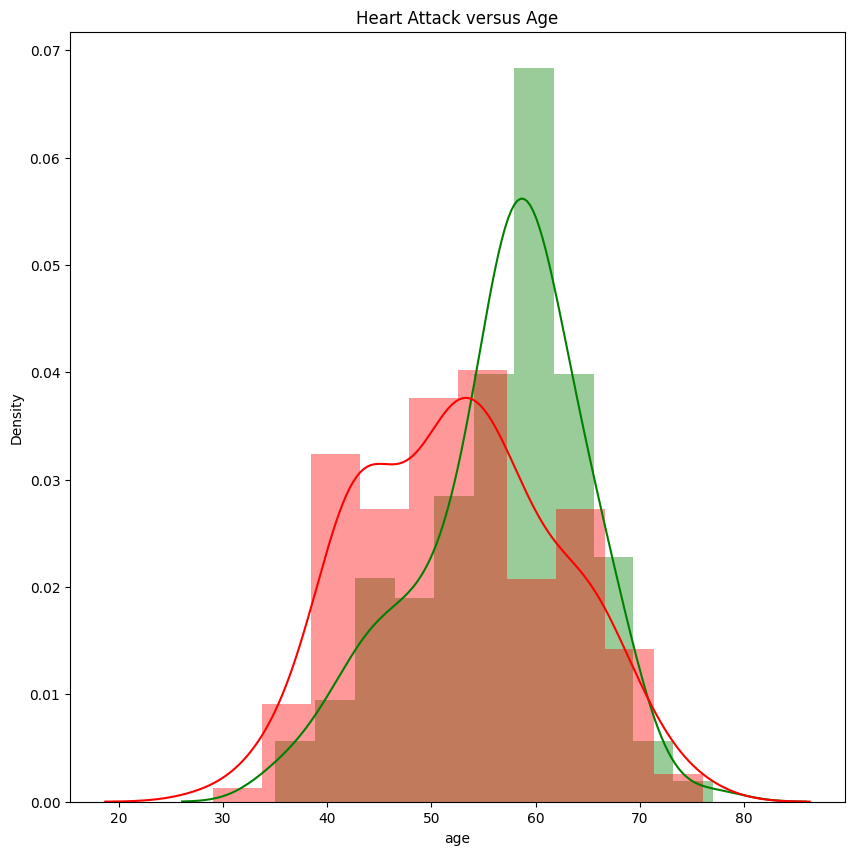

In [70]:
#Plotando gráfico de distribuição do output (Heart Attack) versus Age (Idade)

plt.figure(figsize=(10,10))
sns.distplot(df[df['output'] == 0]["age"], color='green',kde=True,)
sns.distplot(df[df['output'] == 1]["age"], color='red',kde=True)
plt.title('Heart Attack versus Age')
plt.show()

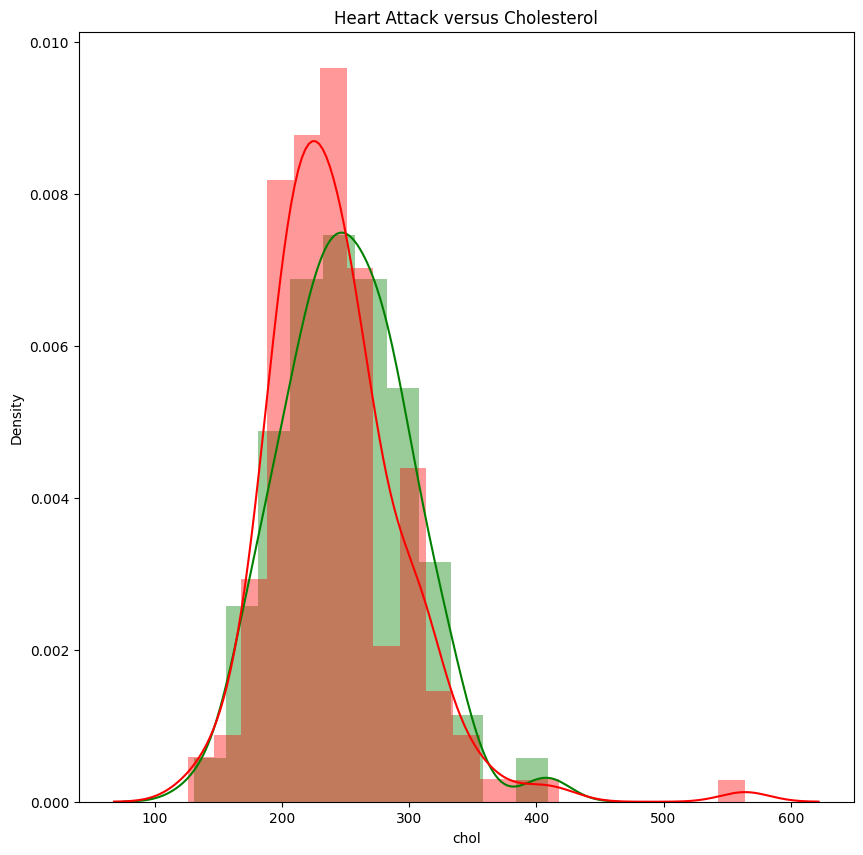

In [71]:
#Plotando gráfico de distribuição do output (Heart Attack) versus Cholesterol (Colesterol)

plt.figure(figsize=(10,10))
sns.distplot(df[df['output'] == 0]["chol"], color='green',kde=True,)
sns.distplot(df[df['output'] == 1]["chol"], color='red',kde=True)
plt.title('Heart Attack versus Cholesterol')
plt.show()

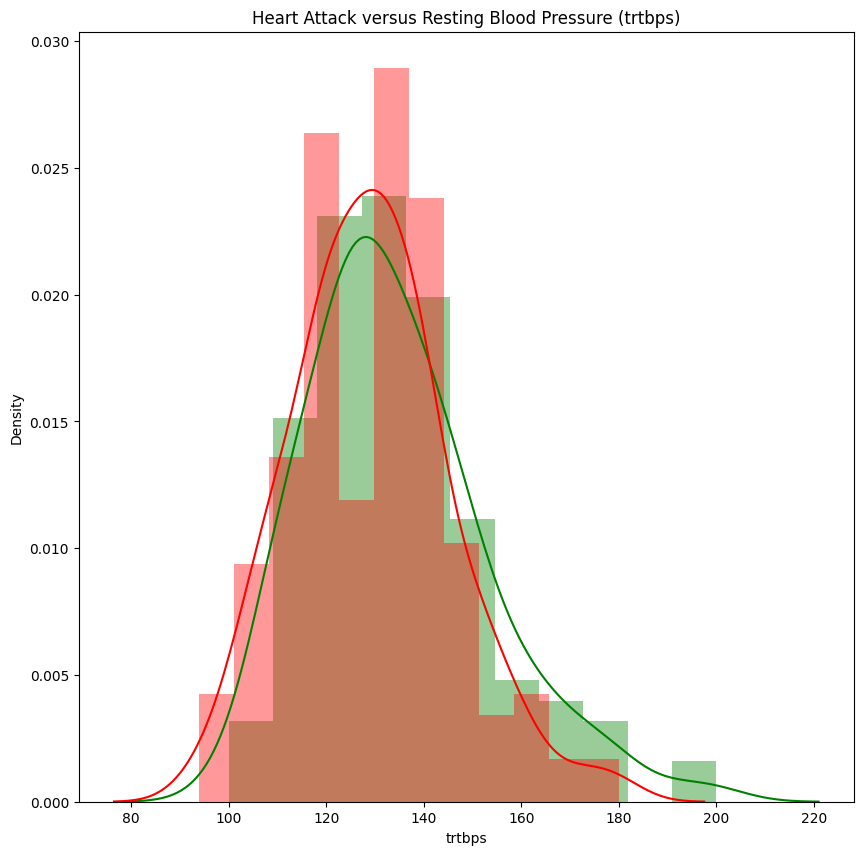

In [72]:
#Plotando gráfico de distribuição do output (Heart Attack) versus trtbps

plt.figure(figsize=(10,10))
sns.distplot(df[df['output'] == 0]["trtbps"], color='green',kde=True,)
sns.distplot(df[df['output'] == 1]["trtbps"], color='red',kde=True)
plt.title('Heart Attack versus Resting Blood Pressure (trtbps)')
plt.show()

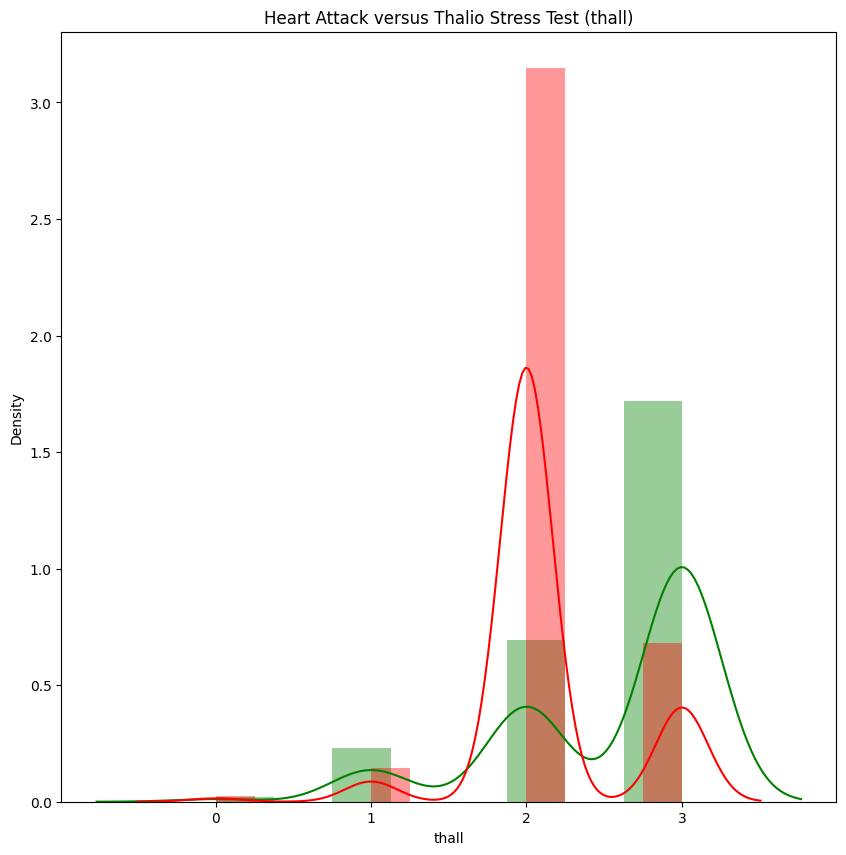

In [73]:
#Plotando gráfico de distribuição do output (Heart Attack) versus thall

plt.figure(figsize=(10,10))
sns.distplot(df[df['output'] == 0]["thall"], color='green',kde=True,)
sns.distplot(df[df['output'] == 1]["thall"], color='red',kde=True)
plt.title('Heart Attack versus Thalio Stress Test (thall)')
plt.show()

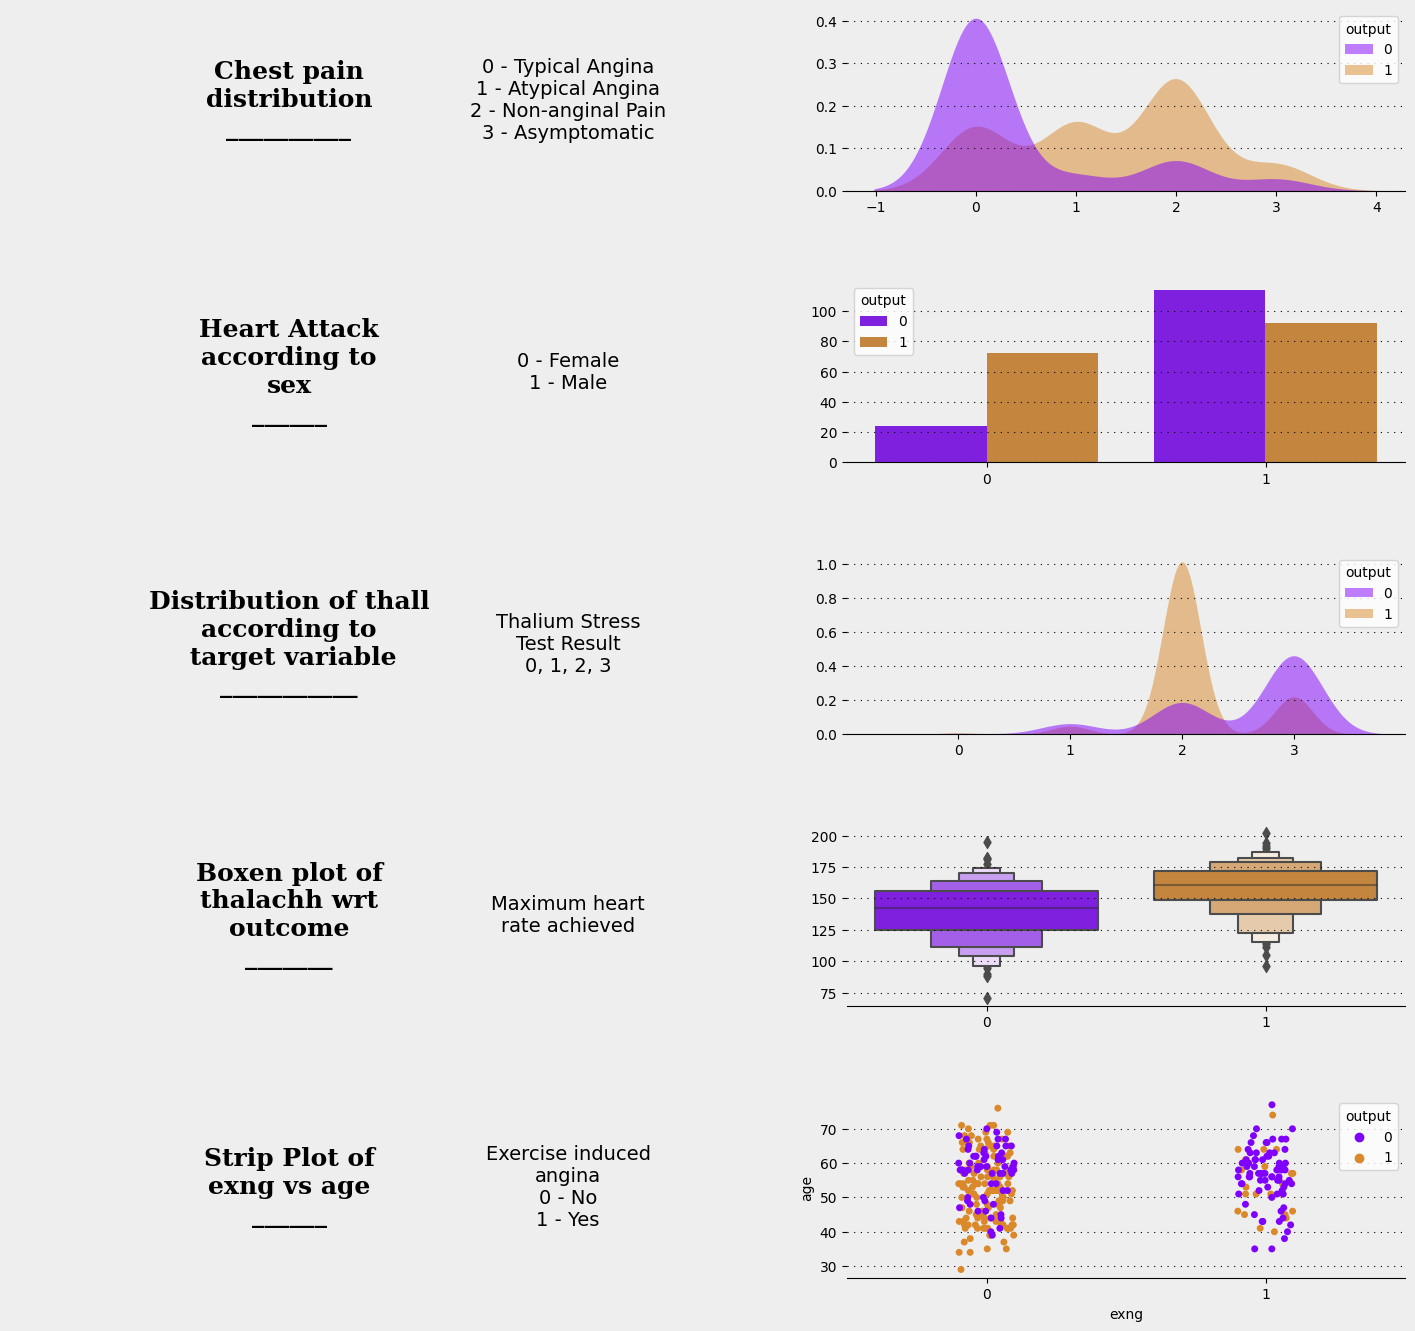

In [74]:
#Plotagem dos gráficos de distribuição das variáveis com relação ao output = Heart Attack (Ataque Cardíaco)

fig = plt.figure(figsize=(18,20))
gs = fig.add_gridspec(6,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax4 = fig.add_subplot(gs[1,0])
ax5 = fig.add_subplot(gs[1,1])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[3,0])
ax9 = fig.add_subplot(gs[3,1])
ax10 = fig.add_subplot(gs[4,0])
ax11 = fig.add_subplot(gs[4,1])

background_color = "#eeeeee"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color)
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)
ax10.set_facecolor(background_color)
ax11.set_facecolor(background_color)

# Cp title
# 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
ax0.text(0.5,0.5,"Chest pain\ndistribution\n__________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.text(1,.5,"0 - Typical Angina\n1 - Atypical Angina\n2 - Non-anginal Pain\n3 - Asymptomatic",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

# Cp
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='cp',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")


# Sex title
ax4.text(0.5,0.5,"Heart Attack\naccording to\nsex\n______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.text(1,.5,"0 - Female\n1 - Male",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Sex
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='sex',palette=["#8000ff","#da8829"], hue='output')
ax5.set_xlabel("")
ax5.set_ylabel("")

# Thall title
ax6.text(0.5,0.5,"Distribution of thall\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.text(1,.5,"Thalium Stress\nTest Result\n0, 1, 2, 3",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Thall
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df, x='thall',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thalachh title
ax8.text(0.5,0.5,"Boxen plot of\nthalachh wrt\noutcome\n_______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.text(1,.5,"Maximum heart\nrate achieved",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Thalachh
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax9, data=df,x='output',y='thalachh',palette=["#8000ff","#da8829"])
ax9.set_xlabel("")
ax9.set_ylabel("")



# Exng title
ax10.text(0.5,0.5,"Strip Plot of\nexng vs age\n______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax10.text(1,.5,"Exercise induced\nangina\n0 - No\n1 - Yes",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax10.spines["bottom"].set_visible(False)
ax10.set_xticklabels([])
ax10.set_yticklabels([])
ax10.tick_params(left=False, bottom=False)


# Exng
ax11.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.stripplot(ax=ax11, data=df,x='exng',y='age',hue='output',palette=["#8000ff","#da8829"])
ax9.set_xlabel("")
ax9.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)
    ax10.spines[i].set_visible(False)
    ax11.spines[i].set_visible(False)

**Pair Plot**

Um pair plot, ou gráfico de pares, é uma visualização que mostra as relações bivariadas entre diferentes pares de variáveis em um conjunto de dados. É uma ferramenta útil para entender a correlação entre as variáveis e identificar padrões.

<Figure size 2000x2000 with 0 Axes>

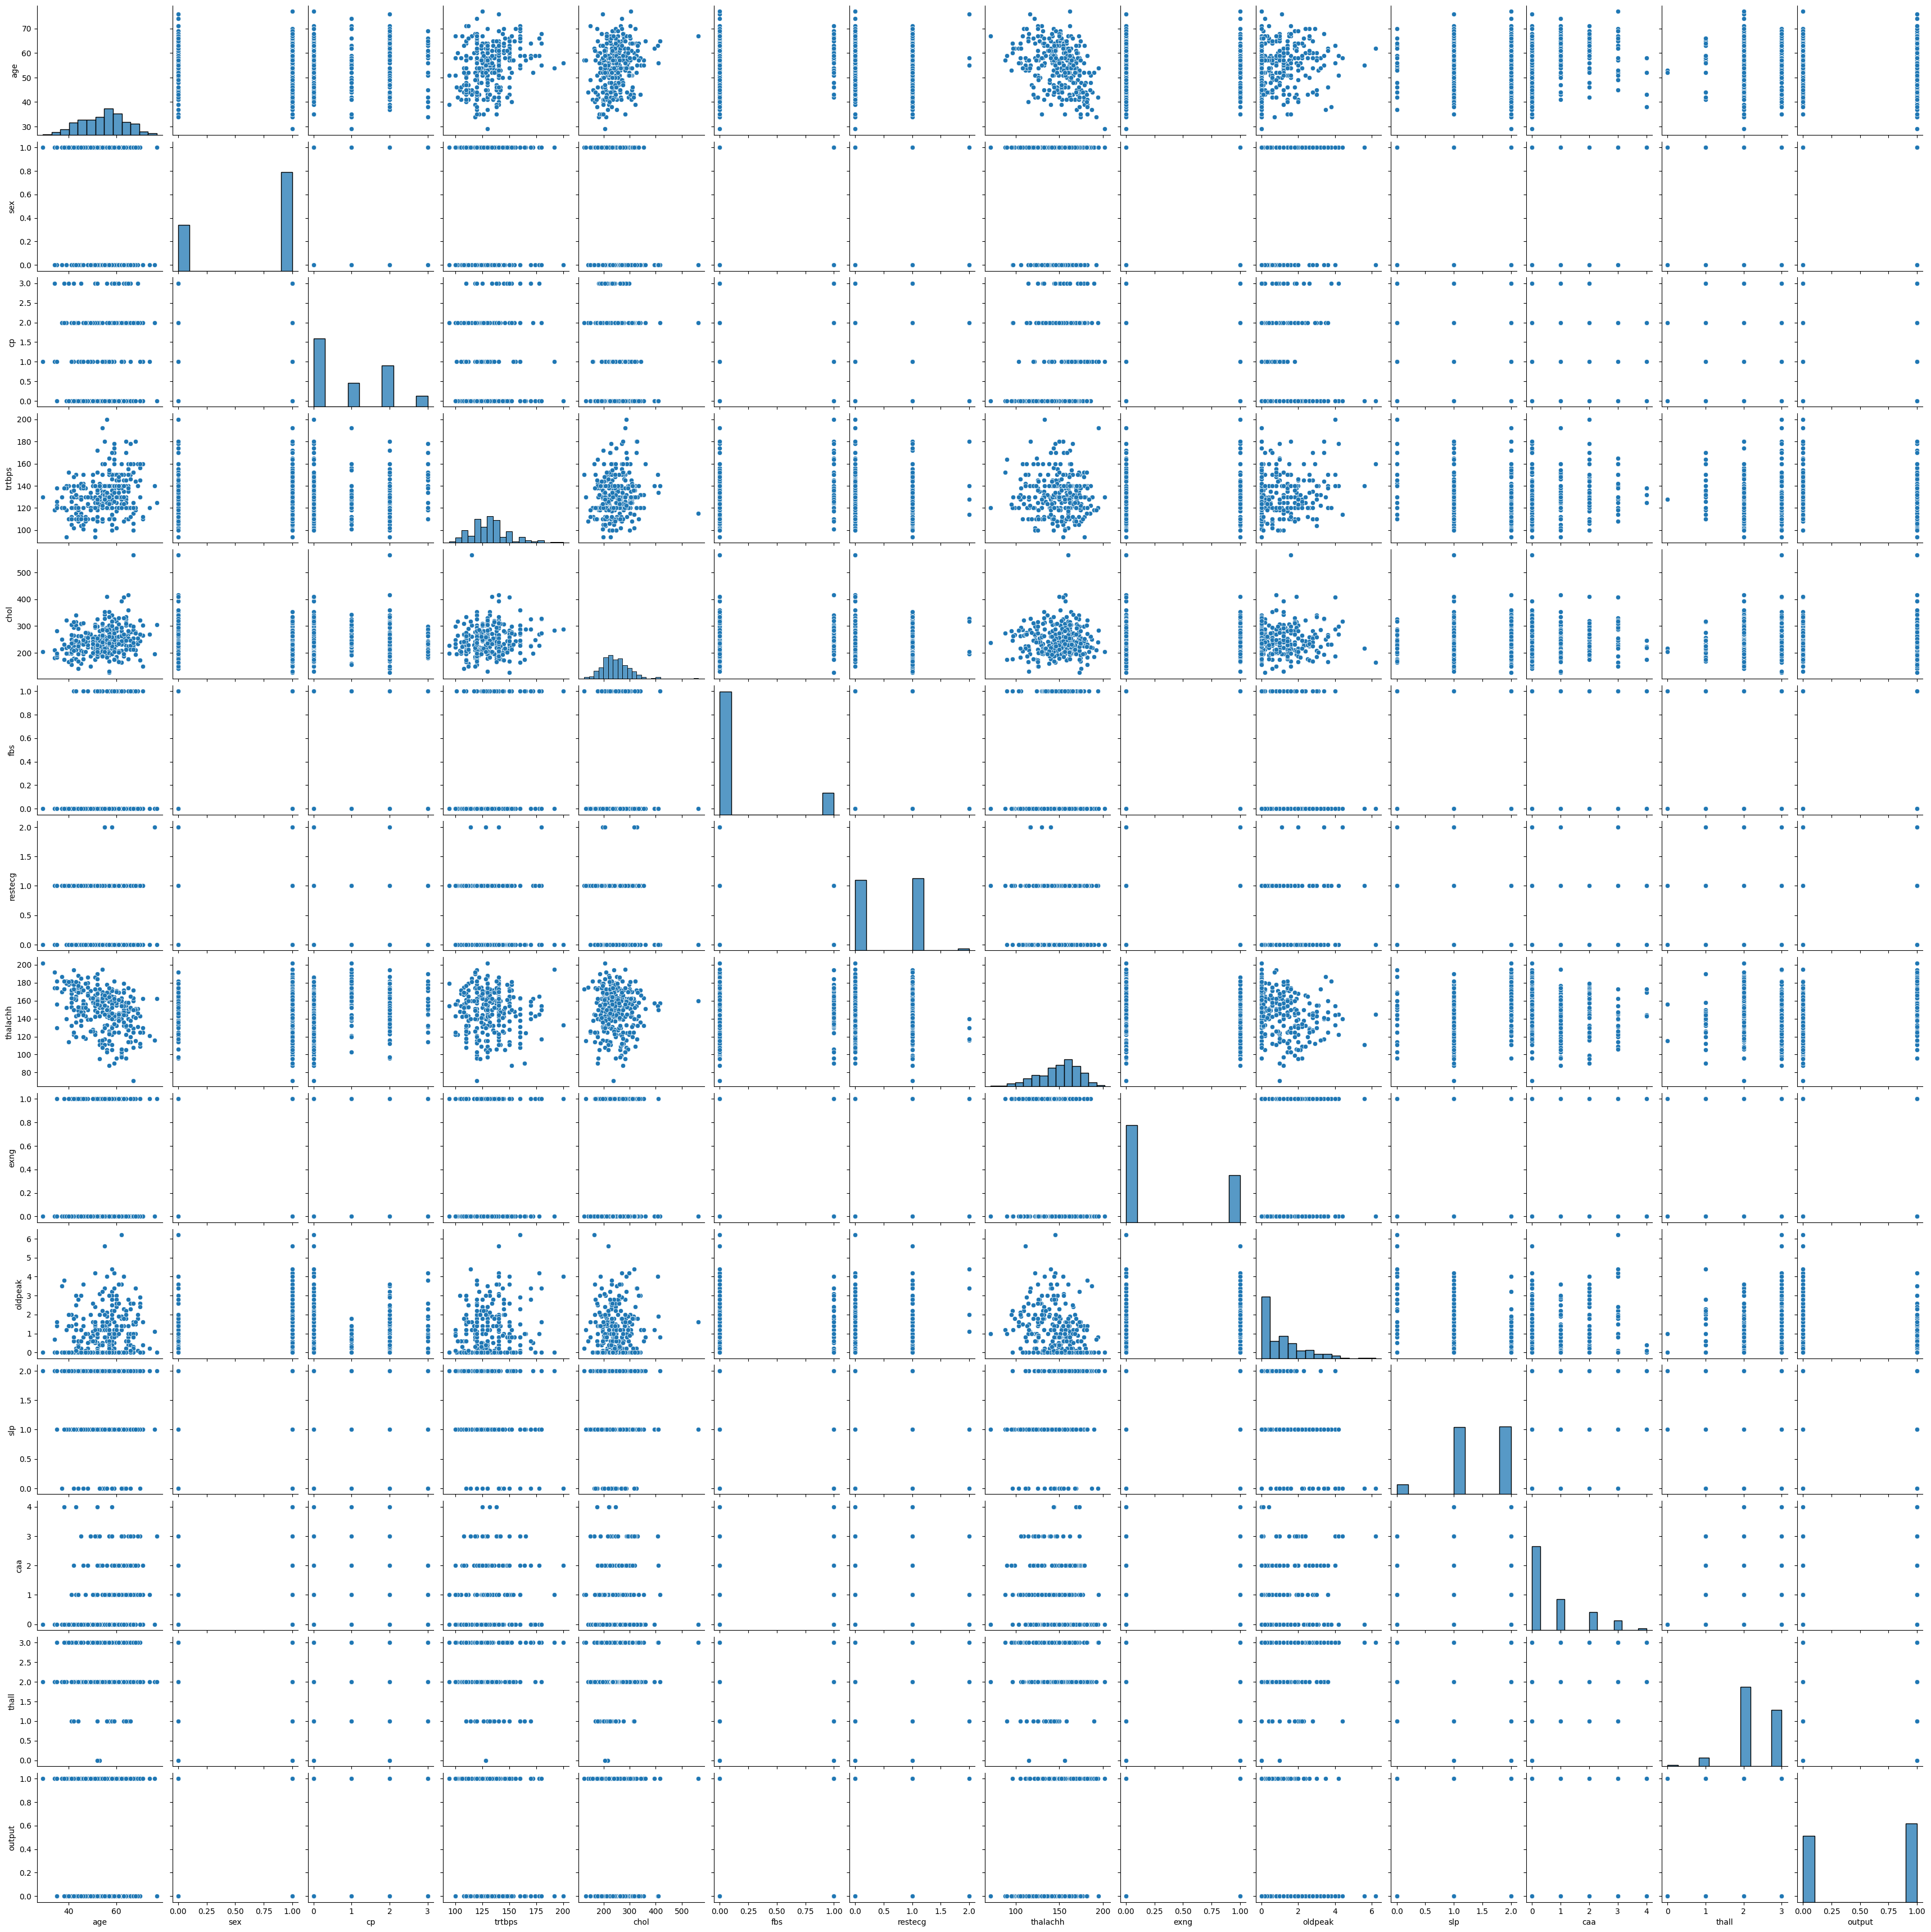

In [75]:
#Plotando uma visualização global das variáveis e as interações existentes (Pair Plot)

#Pair plot

plt.figure(figsize=(20,20))
sns.pairplot(df)
plt.show()

**Conclusões da Análise Exploratória:**

1. Não há valores NaN nos dados.
2. Existem certos valores discrepantes em todos os recursos contínuos.
3. Os dados consistem em mais que o dobro do número de pessoas com sexo = 1 do que sexo = 0.
4. A matriz de correlação sugere que pode haver correlação entre o output = ataque cardíaco e cp, thalachh e slp.
5. É intuitivo que os idosos possam ter maiores chances de ataque cardíaco, mas de acordo com o gráfico de distribuição da idade em relação ao resultado, é evidente que este não é o caso.
6. De acordo com o gráfico de distribuição da produção do thalachh wrt, as pessoas com maior frequência cardíaca máxima alcançada têm maiores chances de ataque cardíaco.
7. De acordo com o gráfico de distribuição do colesterol versus output, pessoas com maiores níveis de colesterol tendem a ter ataque cardíaco.
8. A análise dos dados apresentados no gráfico de distribuição versus output fala sobre o seguinte:
* Pessoas com dor no peito não anginosa, ou seja, com cp = 2 têm maiores chances de infarto.
* Pessoas com sexo = 1 têm maior chance de ataque cardíaco.
* Pessoas com tal = 2 têm chances muito maiores de ataque cardíaco.
* Pessoas que não apresentaram angina induzida por exercício, ou seja, com exng = 0, têm maior chance de ataque cardíaco.

**4.5 Processamento dos Dados**


Nesta etapa do projeto, procedemos com a divisão do nosso dataframe em duas partes: x e y para iniciar a aplicação dos algoritmos.
As bibliotecas específicas para a realização da divisão do dataframe em treino e teste, do preprocessamento (Scaling) e dos métodos de Machine Learning aplicados foram importadas e os processos aplicados.

In [76]:
#Dividindo o dataframe para a aplicação dos algoritmos de ML
#Criando a variável x e y

x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
x,y



(array([[63.,  1.,  3., ...,  0.,  0.,  1.],
        [37.,  1.,  2., ...,  0.,  0.,  2.],
        [41.,  0.,  1., ...,  2.,  0.,  2.],
        ...,
        [68.,  1.,  0., ...,  1.,  2.,  3.],
        [57.,  1.,  0., ...,  1.,  1.,  3.],
        [57.,  0.,  1., ...,  1.,  1.,  2.]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [77]:
#Importando método de divisão dos dados em treino e teste

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)
print('Existem {} amostras de treino e {} amostras de teste'.format(x_train.shape[0], x_test.shape[0]))

Existem 241 amostras de treino e 61 amostras de teste


In [78]:
#Realizando o processamento dos dados

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train,x_test

(array([[-1.30504994, -1.4186261 ,  0.98544689, ..., -0.61492051,
         -0.70674006, -0.49876142],
        [ 1.25925059, -1.4186261 ,  0.98544689, ..., -0.61492051,
          0.29516791, -0.49876142],
        [ 0.36731998,  0.70490738,  0.98544689, ...,  0.99590387,
         -0.70674006, -0.49876142],
        ...,
        [ 0.14433732,  0.70490738,  1.94307874, ..., -0.61492051,
         -0.70674006,  1.1478345 ],
        [-0.85908463,  0.70490738,  0.98544689, ...,  0.99590387,
         -0.70674006, -0.49876142],
        [ 0.36731998,  0.70490738,  0.98544689, ...,  0.99590387,
          1.29707587,  1.1478345 ]]),
 array([[ 0.81328528,  0.70490738,  0.02781503, -0.67462818,  0.65089023,
         -0.40527917, -0.97525383, -1.96657306, -0.6983225 ,  0.27236593,
         -0.61492051,  0.29516791,  1.1478345 ],
        [ 1.03626794,  0.70490738,  1.94307874,  2.19385084, -0.36856884,
         -0.40527917, -0.97525383,  0.23525787, -0.6983225 , -0.39657867,
         -0.61492051, -0.706

**Logistic Regression**

A regressão logística é um cálculo usado para prever um resultado binário onde somente duas possibilidades são possíveis: ou algo acontece ou não. Isso pode ser exibido como Sim/Não, Aprovado/Reprovado, Vivo/Morto, etc.

Variáveis independentes são analisadas para determinar o resultado binário, com os resultados caindo em uma de duas categorias. As variáveis independentes podem ser categóricas ou numéricas, mas a variável dependente é sempre categórica. Escrito assim:

P(Y=1|X) ou P(Y=0|X)

Calcula a probabilidade da variável dependente Y, dada a variável independente X, com cada objeto tendo uma probabilidade entre 0 e 1.

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_auc_score

In [80]:
LogisticR = LogisticRegression()
LogisticR.fit(x_train, y_train)
predicted=LogisticR.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print(classification_report(y_test,predicted))
acc=roc_auc_score(y_test,predicted)

Confusion Matrix : 
 [[22  5]
 [ 3 31]]

              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61




**Naive Bayes Gaussian**

O algoritmo Naive Bayes Gaussiano é uma variante do classificador Naive Bayes, um modelo probabilístico que utiliza o Teorema de Bayes para realizar a classificação. O "Naive" (ingênuo) no nome refere-se à suposição de independência condicional entre as características, o que simplifica o cálculo das probabilidades.

Baseia-se no Teorema de Bayes, que descreve a probabilidade condicional de um evento, dado outro evento relacionado. O classificador Naive Bayes Gaussiano assume independência condicional entre as características. Ou seja, a presença ou ausência de uma característica não afeta a presença ou ausência de outra.O termo "Gaussiano" indica que o modelo assume uma distribuição normal (Gaussiana) para as características contínuas. Isso significa que a probabilidade de uma característica seguir uma distribuição normal é considerada no cálculo.

In [81]:
from sklearn.naive_bayes import GaussianNB

GaussianNB = GaussianNB()
GaussianNB.fit(x_train, y_train)
predicted=GaussianNB.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print(classification_report(y_test,predicted))
acc=roc_auc_score(y_test,predicted)

Confusion Matrix : 
 [[24  3]
 [ 3 31]]

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        27
           1       0.91      0.91      0.91        34

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



**Support Vector Machine**

O Support Vector Machine (SVM) é um modelo de aprendizado de máquina usado tanto para classificação quanto para regressão. O objetivo principal do SVM na tarefa de classificação é encontrar um hiperplano ótimo que separe os exemplos de diferentes classes no espaço de características.

Um hiperplano é uma superfície de decisão que separa o espaço de características em duas regiões, uma para cada classe. Em um problema de duas classes, o hiperplano é uma linha; em problemas de múltiplas classes, é um espaço de dimensões superiores.

São os pontos de dados que estão mais próximos do hiperplano de decisão e influenciam a posição e orientação do hiperplano. Estes são os "support vectors" que dão nome ao modelo.

A margem é a distância entre o hiperplano de decisão e os vetores de suporte mais próximos. O SVM busca maximizar essa margem, o que geralmente resulta em um modelo mais robusto e capaz de generalizar bem para novos dados.

In [82]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)
predicted = model.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print(classification_report(y_test,predicted))
acc=roc_auc_score(y_test,predicted)

Confusion Matrix : 
 [[26  1]
 [ 3 31]]

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        27
           1       0.97      0.91      0.94        34

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61



**5. Conclusão**

Diante dos resultados apresentados, podemos fazer uma comparação geral com base nas métricas fornecidas para os três métodos de machine learning aplicados neste projeto: Support Vector Machine - SVM, Naive Bayes Gaussiano e Regressão Logística.

1. Métricas de Acurácia:

* SVM: 0.93
* Naive Bayes Gaussiano: 0.90
* Regressão Logística: 0.87

2. Outras Métricas (Macro AVG F1-Score):

* SVM: 0.93
* Naive Bayes Gaussiano: 0.90
* Regressão Logística: 0.87


Com base nas métricas fornecidas, o SVM parece ter um desempenho ligeiramente superior em termos de acurácia geral e F1-Score médio (macro AVG). No entanto, a escolha do "melhor" método dependerá de vários fatores, incluindo a importância relativa de falsos positivos e falsos negativos para o seu problema específico, a interpretabilidade do modelo e a escalabilidade para conjuntos de dados maiores.

Além disso, é importante considerar se alguma das métricas tem um peso maior para o seu cenário específico. Por exemplo, se a identificação correta de casos positivos (recall) for crucial, você pode dar mais importância a essa métrica ao tomar sua decisão.

Em resumo, a escolha entre SVM, Naive Bayes Gaussiano e Regressão Logística apresentou bons resultados na predição de possível ocorrência de ataque cardíaco em pacientes, a partir de dados clínicos. Entretanto, a melhor escolha entre esses métodos dependerá dos requisitos específicos do problema e das características do conjunto de dados. Como recomendação para continuidade deste estudo, consideramos a validação cruzada e a análise mais aprofundada para garantir a robustez dos resultados.